## Exercise 1
(a) Draw the function "y=x^3" on the interval from -10 to 10. Compile the plot once with N=5 and with N=100 individual values for the x-axis

(b) 

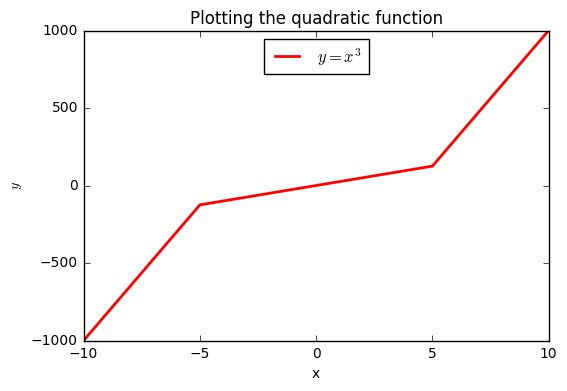

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# (a) N=5
x = np.linspace(-10,10,5)
y = x**3

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label = '$y = x^3$')
ax.set_title('Plotting the quadratic function')
ax.set_xlabel('x')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper center')

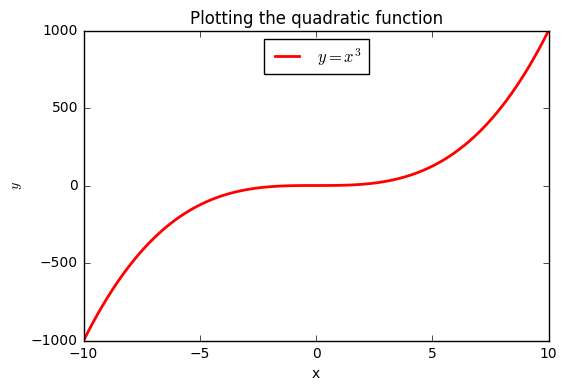

In [34]:
# (a) N=100
x = np.linspace(-10,10,100)
y = x**3

fig, ax = plt.subplots()
ax.plot(x, y, 'r-', linewidth=2, label = '$y = x^3$')
ax.set_title('Plotting the quadratic function')
ax.set_xlabel('x')
ax.set_ylabel('$y$')
ax.legend(loc = 'upper center')

## Exercise 2
Consider the utility function $U(B,C)=B^{\alpha} C^{(1-\alpha)}$ of a Oktoberfest visitor consuming beer (B) and chicken (C).
(a) Write a function that returns the utilily depending on the amount of consumed chicken and beers

(b) Plot the utility in dependence of the amount of beers with $\alpha=0.7$ and $C=2$, the range of beers should be from 0-10.

(C) Plot the isoquants of the same utility for all combination of C and B in the range from 0 to 10.

(d) Consider now the prices of $p_B=10 €$ and $p_C=10€$ and a budget of 50€. Draw the budgetline in the graphic from question (c) and guess what the optimal consumption might be. You can set the limits of the x and the y axis by ax.set_xlim([xlim,xmax]), ax.set_ylim([ylim,ymax]).

In [9]:
# a
def utility(C,B,alpha):
    return (C**alpha)*(B**(1-alpha))
print (utility(3,4,0.5))

3.4641016151377544


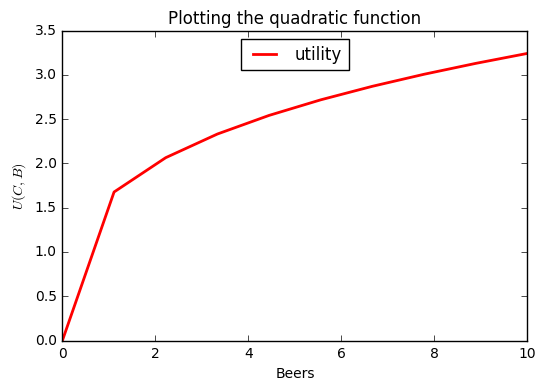

In [12]:
# b
B=np.linspace(0,10,10)
u=utility(2,B,0.7)
fig, ax = plt.subplots()
ax.plot(B, u, 'r-', linewidth=2, label = 'utility')
ax.set_title('Plotting the utility function')
ax.set_xlabel('Beers')
ax.set_ylabel('$U(C,B)$')
ax.legend(loc = 'upper center')

(0, 10)

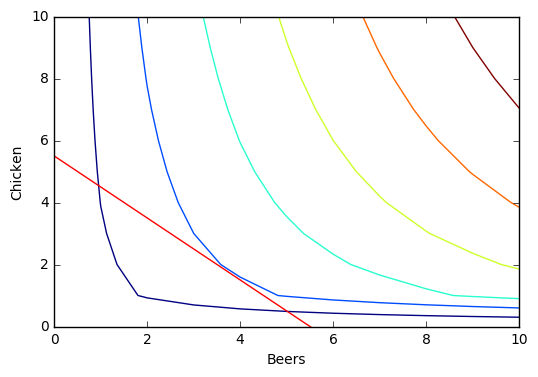

In [45]:
N = 11
## interpolate both production factors over equidistant grid
C = np.linspace(0, 10, N)
B = np.linspace(0, 10, N)
## use meshgrid function 
X, Y = np.meshgrid(C, B)
U = utility(X,Y,0.7)

## plot contour
fig, ax = plt.subplots()
ax.contour(X, Y, U)
ax.set_xlabel('Beers')
ax.set_ylabel('Chicken')

#Budget constraint
def chicken(B):
    return (5.5-B)
ax.plot(B,chicken(B),'r')
ax.set_xlim([0,10])
ax.set_ylim([0,10])

## Exercise 3
In this exercis we will make some analysis on the value of football players.

(a) First of all, make a scatter plot that colors the players according to their value and shows correlates them to their age and the number of goals they where shooting.

(b) Draw a histogram of both the age and the values of the players, which kind of distributions might fit and what are mean and standard deviations?

(c) Set up a regression model where the value of players should be explained by the number of goals and their age only

(d) Now, consider the same model but apply it only to all strikers (position code=2). 


## Exercise 4

(a) Write two functions **demand** and **supply** that both take three arguments, quantity **x** and two function-specific parameters, and capture inverse demand and supply:
\begin{align}
    p^d &= a - b x \\
    p^s &= c + d x
\end{align}

(b) Use a root-finding algorithm to solve for the market-clearing price $p^*$. It may be helpful to define a third function, **excess_demand**, that makes use of the two functions above. Find $p^*$ for $a = 5$, $b = 0.4$, $c = 0$ and $d = 0.3$. 

(c) Import **matplotlib.pyplot** and **seaborn**. Use your functions to replicate the following figure, including all the labels. The parameter values used to generate the graph are the same as in question (b). 


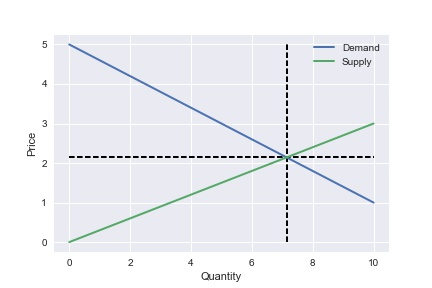

In [8]:
from IPython.display import Image
Image('marketprice.jpg')

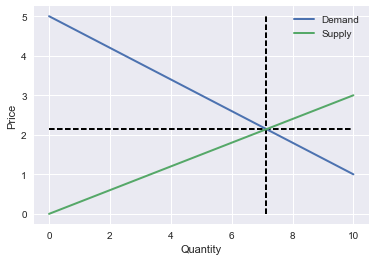

In [9]:
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn


def demand(x, a, b):
    return a - b * x

def supply(x, c, d):
    return c + d * x

def excess_demand(x, a, b, c, d):
    return demand(x, a, b) - supply(x, c, d)

a, b, c, d = 5, 0.4, 0, 0.3

x_mc = scipy.optimize.bisect(excess_demand, 0, 10, args = (a, b, c, d))
p_mc = supply(x_mc, c, d)


x = np.linspace(0, 10, 100)
fig, ax = plt.subplots()
ax.plot(x, demand(x, 5, 0.4), linewidth= 2, label = 'Demand')
ax.plot(x, supply(x, 0, 0.3), linewidth= 2, label = 'Supply')
ax.vlines(x_mc, 0, 5, color='k', linestyle="--", linewidth= 2)
ax.hlines(p_mc, 0, 10, color='k', linestyle="--", linewidth= 2)
ax.set_xlabel('Quantity')
ax.set_ylabel('Price')
ax.legend()
# fig.savefig('marketprice.jpg')

## Exercise 5

In one of the previous problem sets (Week 3 - Strings, question 7), we coded a simple version of the Battleship game. In this question, we use **matplotlib.pyplot** to improve on one dimension of this implementation, the graphical output. If you haven't solved the previous question, feel free to use the code provided in the suggested solutions for that week.

Recall that in our implementation of Battleship, we represented the board (i.e. the ocean) as a list of lists. A tile (i.e., a square of the ocean) was represented by a string, a **"O"** if the tile had not een uncovered yet and an **"X"** if it had been uncovered but without finding the ship. Now, we are going to represent the board as a Numpy array of 0's and 1's, with **0** representing not yet uncovered tiles and **1** representing tiles that have been unsuccessfully checked.

(a) Import **numpy**, **matplotlib.pyplot** and (as before) the **random** module. In addition, run the following import statement: **from IPython import display**.

(b) Modify the **generate_board** function from the previous versions such that it still takes the arguments **x_b** and **y_b**, but returns a *Numpy array* of dimension **x_b**-by-**y_b**, filled with zeros.

(c) Below, we have provided a new version of the **print_board** function. Run the cell below *after you have finished question (b)*. You should get a figure that consists of a blue square.

(d) In the **run_game** function, make the following modifications:

1. Add the lines **fig, ax = plt.subplots()** and **ax.grid()** at the beginning of the function.
2. **print_board** now takes three arguments, instead of one argument as in the previous implementation. Add the arguments **fig** and **ax** to every occurrence of **print_board**.
3. Finally, modify your code so it properly updates tiles on your board from 0 to 1. Hint: In the previous version, the **run_game** function updated tiles from "O" to "X". In addition to replacing "X"s with 1's in your code, there is one small adjustment you have to make - recall that indexing for two-dimensional Numpy arrays works differently than for lists of lists!

(e) Test your implementation for a 5-by-5 board.


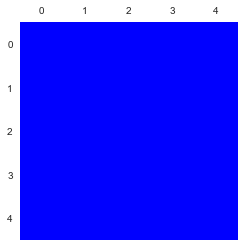

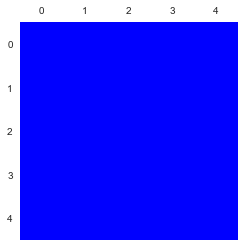

In [12]:
## PROVIDE THIS ONE IN THE QUESTION!

def print_board(board, fig, ax):
    ax.matshow(board, cmap='bwr')
    display.display(fig)

fig, ax = plt.subplots()
ax.grid()    
board = generate_board(5, 5)
print_board(board, fig, ax)


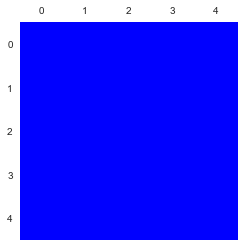

(0, 4)
Current turn: 1
Guess Row:1
Guess Col:1
You missed my battleship!


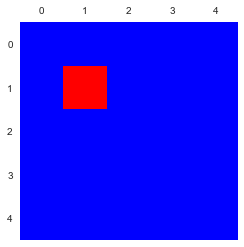

Current turn: 2
Guess Row:2
Guess Col:2
You missed my battleship!


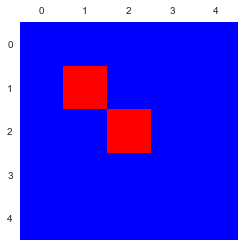

Current turn: 3
Guess Row:3
Guess Col:3
You missed my battleship!


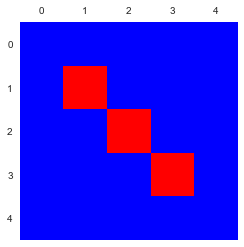

Game Over


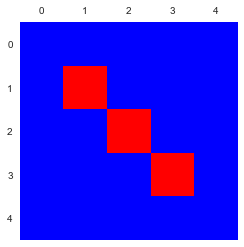

In [10]:
## (a): import packages

import numpy as np
import matplotlib.pyplot as plt

from random import randint
from IPython import display


## (b): generate board
def generate_board(x_b, y_b):
    return np.zeros((x_b, y_b))   


## (d)
def print_board(board, fig, ax):
    ax.matshow(board, cmap='bwr')
    display.display(fig)

def random_pos(x_b, y_b):
    return (randint(0, x_b - 1), randint(0, y_b - 1))

def run_game(x_b, y_b, max_turn):
    
    fig, ax = plt.subplots()
    ax.grid()
    
    board = generate_board(x_b, y_b)
    print_board(board, fig, ax)
    ship_pos = random_pos(x_b, y_b)
    print(ship_pos)
    
    for turn in range(max_turn):
        print('Current turn: {}'.format(turn + 1))
        guess_row = int(input("Guess Row:"))
        guess_col = int(input("Guess Col:"))
    
        if guess_row == ship_pos[0] and guess_col == ship_pos[1]:
            print("Congratulations! You sunk my battleship! You win!")
            break
        else:
            if (guess_row < 0 or guess_row > x_b - 1) or (guess_col < 0 or guess_col > y_b - 1):
                print("Oops, that's not even in the ocean.")
            elif(board[guess_row, guess_col] == 1):
                print("You guessed that one already.")
            else:
                print("You missed my battleship!")
                board[guess_row, guess_col] = 1
            
            print_board(board, fig, ax)
            if turn + 1 == 3:
                print("Game Over")


## (e)
x_b, y_b = 5, 5
max_turn = 3
run_game(x_b, y_b, max_turn)

## Exercise 6 (ADVANCED)

Consider a two-period "cake-eating problem": a social planner needs to decide how to distribute the use of an exhaustible resource over across two periods. As an example, you could think of a given, finite stock of oil, but also of a (binding) limit on greenhouse gas emissions.

The resource is used as an input in a Cobb-Douglas production function, together with capital. Production in period $t$ is given by
\begin{equation*}
	F(K_t, E_t) = K_t^\alpha E_t^{1 - \alpha},\ \ t = 1,2,
\end{equation*}
where $E_t$ denotes the amount of the resource used in period $t$. We havethe following constraint:
\begin{equation*}
E_1 + E_2 = R
\end{equation*}
where $R$ is the stock of the finite resource. 

Other than that, this is a standard neoclassical growth model. The planner maximizes lifetime (here two periods) utility of a representative household, with per-period utility as a function of consumption $C_t$:
\begin{equation*}
    \max u(C_1) + \beta u(C_2)
\end{equation*}
As a functional form for $u$, assume a *constant intertemporal elasticity of substitution*:
\begin{equation*}
    u(C) = \frac{C^{1 - \nu}}{1 - \nu}
\end{equation*}

The planner's constraints are given by
\begin{align*}
	C_1 + K_2 &= K_1^{\alpha} E_1^{1-\alpha} + (1 - \delta) * K_1 \\ 
	C_2 &= K_2^{\alpha} E_2^{1-\alpha} + (1 - \delta) * K_2 \\ 
    E_1 + E_2 &= R
\end{align*}

Aside: with log utility ($u(C) = \log(C)$) and full depreciation ($\delta = 1$), it would be straightforward to solve this model analytically.


(a) Define functions **u** and **F** that implement the utility and the production function given above. In addition, write a function that captures the objective function $u(C_1) + \beta u(C_2)$.

(b) Use Scipy's minimization routine (**scipy.optimize.minimize**) to solve the model for the set of parameter values given below. 



In [ ]:
## Model parameters
alpha = 0.6
beta = 0.98
R = 1
K1 = 1
nu = 2
delta = 0.9

In [15]:
import scipy.optimize

## (a) define functions
def u(x, nu):
    """
    Utility function
    """
    return (1 - nu)**(-1) * x**(1-nu)
    
def F(k, e, alpha):
    """
    Production function: Cobb-Douglas
    """
    return k**(alpha) * e**(1-alpha)

def obj(x, alpha, beta, delta, nu, K1):
    """
    Computes the social planner's objective function, i.e. the representative agent's lifetime utility
    """
    E1, I = x
    return - u(F(K1, E1, alpha) - I, nu) \
            - beta * u( F( (1-delta) * K1 + I, R - E1, alpha) + (1 - delta) * ( (1-delta) * K1 + I), nu)


## Set parameters
alpha = 0.6
beta = 0.98
R = 1
K1 = 1
nu = 2
delta = 0.9

## Closed-form solution (with log utility and full depreciation), used as initial guess below
E1 = R * (1 + alpha * beta)/(1 + alpha * beta + beta)
K2 = alpha * beta * F(K1, E1, alpha) / (1 + alpha * beta)
x0 = [E1, K2]
print(x0)

## determine bounds for choice variables
bnds = [(1e-8, 1e+12), (1e-8, 1e+12)]


## Baseline
# run minimization routine
res = scipy.optimize.minimize(obj, x0,\
                              args = tuple([alpha, beta, delta, nu, K1]), \
                              bounds = bnds, method='SLSQP', tol = 1e-12)
print(res.x)


[0.618380062305296, 0.3896581595309572]
[ 0.58453028  0.36871645]


This is intuitive: recall that $\nu > 1$ indicates a lower elasticity of intertemporal substitution (or a higher aversion to intertemporal consumption inequality), hence if the household is richer in the future (due to a higher productivity), the incentive to save today is weaker. A lower capital stock in period 2 implies that the marginal return to capital - $F_K(K_2, E_2) + 1 - \delta$ - increases. By the Hotelling rule, this implies that the *relative* marginal return to fossil fuel in period 2 (relative to period 1) has to rise as well. This can be achieved by shifting extraction from period 2 to period 1, thus leading to a (albeit small) increase in current fossil fuel use.